In [15]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [16]:
import matplotlib.pyplot as plt

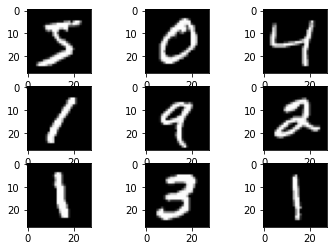

In [17]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
from matplotlib import pyplot as plt
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
plt.show()

In [18]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
print('x_train shape', x_train.shape)

x_train shape (60000, 28, 28)


In [20]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test /= 255

In [21]:
y_train = np_utils.to_categorical(y_train,10)

In [22]:
y_test = np_utils.to_categorical(y_test,10)

In [23]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [26]:
history=model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.2447 - accuracy: 0.9247 - val_loss: 0.1128 - val_accuracy: 0.9647
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1036 - accuracy: 0.9691 - val_loss: 0.0839 - val_accuracy: 0.9752
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0606 - accuracy: 0.9818 - val_loss: 0.0716 - val_accuracy: 0.9804
Epoch 5/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.0862 - val_accuracy: 0.9782
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0469 - accuracy: 0.9864 - val_loss: 0.0732 - val_accuracy: 0.9797
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0790 - val_accuracy: 0.981

In [27]:
model.save('final_mnist_ann.h5')

In [28]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Testlost=', score[0])
print('TestAC=', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1214 - accuracy: 0.9849
Testlost= 0.12138992547988892
TestAC= 0.9848999977111816


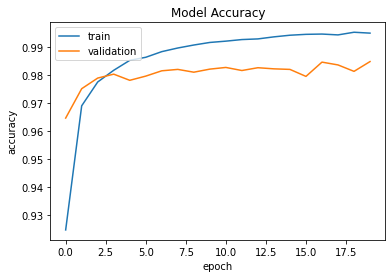

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')